# English Wikipedia page views, 2008 - 2017
## Assignment 1 - due 10/19/2017
## Todd Schultz

This example Jupyter Notebook imports the page view data from the English Wikipedia from various sources, combines the data, stores it, and generates a plot of the number of page views over time. The purpose is to document the growth of Wikipedia and to provide a usefull example of a well-documented notebook that follows the best practices for open and reproducible research. 


## Libaries Used
The libaries used in this analysis are collected and stated here with the standary Python import command. 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

%matplotlib notebook

## Wikimedia API requests
You can use this example API request as a starting point for building your API queries. Note that the [Legacy Pagecounts API](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Legacy_Pagecounts) has slightly different schema than the [pageview API](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews) shown here.

This sample API request would get you all pageviews by web crawlers on the mobile website for English Wikipedia from July 1, 2008 through September 30, 2017.

### Utility function to create plotting variable
The funciton below creates a utility variable, 'x', in a DataFrame that will be useful for plotting. The variable 'x' is the a numeric value to represent the year and month of the data point as a numeric value defined as the value of the year plus a fraction from the number of month minus one divide by 12. This function also adds separate columns for the values of the year and month. 

In [7]:
def addPlotVar(df):
    nrows,ncols = df.shape
    
    # Create placeholder variable, 'x' for plotting the time series 
    df = df.assign(**{'x':np.full(len(df), np.nan)})
    df = df.assign(**{'Year':np.zeros(nrows, dtype=np.int)})
    df = df.assign(**{'Month':np.zeros(nrows, dtype=np.int)})
    
    # Compute the numeric values for the plotting variable, 'x'
    Year = np.zeros(nrows, dtype=np.int)
    Month = np.zeros(nrows, dtype=np.int)
    datenum = np.zeros(nrows)
    for irow in range(0,nrows):
        Year[irow] = int(df['timestamp'][irow][0:4])
        Month[irow] = int(df['timestamp'][irow][4:6])
        datenum[irow] = float(Year[irow]) + (float(Month[irow]) - 1)/12
            
    # add the plot variable values to the DataFrame
    df['x'] = datenum
    df['Year'] = Year
    df['Month'] = Month
    return df

### Pagecount API
Reques the data from the Wikimedia servers using the Pagecount API. The Pagecount API includes data from January 2008 through July 2016.

In [8]:
# Pagecount desktop views
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access}/{granularity}/{start}/{end}'

headers={'User-Agent' : 'https://github.com/your_github_username', 'From' : 'your_uw_email@uw.edu'}

params = {'project' : 'en.wikipedia.org',
            'access' : 'desktop-site',
            'granularity' : 'monthly',
            'start' : '2008010100',
            'end' : '2016081000'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
response = api_call.json()
#print(response)

# Write data to JSON file
with open('pagecount_desktop-site_200801-201607.json', 'w') as outfile:
    json.dump(response, outfile, indent=4)
    
# How to index into the data dictionary, examples from stackoverflow.com
# response.get('items', {})[0].get('views')
# response['items'][22]['views']    

# Create data frame and add numeric values for the plotting variable
pcdesktop = pd.DataFrame(response['items'])
pcdesktop = addPlotVar(pcdesktop)

# Change view count column name to pageview_mobile_views
pcdesktop.rename(columns = {'count':'pagecount_desktop_views'}, inplace = True)
pcdesktop

,access-site,pagecount_desktop_views,granularity,project,timestamp,x,Year,Month
0,desktop-site,4930902570,monthly,en.wikipedia,2008010100,2008.000000,2008,1
1,desktop-site,4818393763,monthly,en.wikipedia,2008020100,2008.083333,2008,2
2,desktop-site,4955405809,monthly,en.wikipedia,2008030100,2008.166667,2008,3
3,desktop-site,5159162183,monthly,en.wikipedia,2008040100,2008.250000,2008,4
4,desktop-site,5584691092,monthly,en.wikipedia,2008050100,2008.333333,2008,5
5,desktop-site,5712104279,monthly,en.wikipedia,2008060100,2008.416667,2008,6
6,desktop-site,5306302874,monthly,en.wikipedia,2008070100,2008.500000,2008,7
7,desktop-site,5140155519,monthly,en.wikipedia,2008080100,2008.583333,2008,8
8,desktop-site,5479533823,monthly,en.wikipedia,2008090100,2008.666667,2008,9
9,desktop-site,5679440782,monthly,en.wikipedia,2008100100,2008.750000,2008,10


In [9]:
# Pagecount mobile views
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access}/{granularity}/{start}/{end}'

headers={'User-Agent' : 'https://github.com/your_github_username', 'From' : 'your_uw_email@uw.edu'}

params = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-site',
            'granularity' : 'monthly',
            'start' : '2008010100',
            'end' : '2016081000'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
response = api_call.json()
#print(response)

# Write data to JSON file
with open('pagecount_mobile-site_200801-201607.json', 'w') as outfile:
    json.dump(response, outfile, indent=4)

# Create data frame and add numeric values for the plotting variable
pcmobile = pd.DataFrame(response['items'])
pcmobile = addPlotVar(pcmobile)

# Change view count column name to pageview_mobile_views
pcmobile.rename(columns = {'count':'pagecount_mobile_views'}, inplace = True)
#pcmobile

Combine both pagecount dataframes into a single table.

In [10]:
pagecountdummy = pcdesktop.merge(pcmobile, how='outer', on='timestamp')
# From https://stackoverflow.com/questions/21291259/convert-floats-to-ints-in-pandas
#pagecountdummy['pagecount_mobile_views'] = pagecountdummy['pagecount_mobile_views'].fillna(0.0).apply(np.int64)
a = pagecountdummy['pagecount_mobile_views'].fillna(0.0).apply(np.int64)

# Compute total number of page views 
#pagecount_all_view = pagecountdummy['pagecount_desktop_views'] + pagecountdummy['pagecount_mobile_views']
pagecount_all_view = pagecountdummy['pagecount_desktop_views'] + a

# Create pageview data frame
pagecountdf = pd.DataFrame(data={'Year': pagecountdummy['Year_x']})
pagecountdf = pagecountdf.assign(**{'Month': pagecountdummy['Month_x']})
pagecountdf = pagecountdf.assign(**{'pagecount_all_views': pagecount_all_view})
pagecountdf = pagecountdf.assign(**{'pagecount_desktop_views': pagecountdummy['pagecount_desktop_views']})
pagecountdf = pagecountdf.assign(**{'pagecount_mobile_views': pagecountdummy['pagecount_mobile_views']})
pagecountdf = pagecountdf.assign(**{'timestamp': pagecountdummy['timestamp']})

pagecountdf = addPlotVar(pagecountdf)

# Save copy of pageview plotting variable
xpagecount = np.array(pagecountdf['x'])

pagecountdf

,Year,Month,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,timestamp,x
0,2008,1,4930902570,4930902570,NaN,2008010100,2008.000000
1,2008,2,4818393763,4818393763,NaN,2008020100,2008.083333
2,2008,3,4955405809,4955405809,NaN,2008030100,2008.166667
3,2008,4,5159162183,5159162183,NaN,2008040100,2008.250000
4,2008,5,5584691092,5584691092,NaN,2008050100,2008.333333
5,2008,6,5712104279,5712104279,NaN,2008060100,2008.416667
6,2008,7,5306302874,5306302874,NaN,2008070100,2008.500000
7,2008,8,5140155519,5140155519,NaN,2008080100,2008.583333
8,2008,9,5479533823,5479533823,NaN,2008090100,2008.666667
9,2008,10,5679440782,5679440782,NaN,2008100100,2008.750000


### Pageview API
Request the data from the Wikimedia servers using the Pageview API. The Pageview API includes data from July 2015 onward, however this study is limited to going through September 2017.

In [11]:
# Pageview desktop-web views
# Define api call structure and parameters
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

headers={'User-Agent' : 'https://github.com/your_github_username', 'From' : 'your_uw_email@uw.edu'}

params = {'project' : 'en.wikipedia.org',
            'access' : 'desktop',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017101000' #use the first day of the following month to ensure a full month of data is collected
            }

# Make api call and retrieve JSON data
api_call = requests.get(endpoint.format(**params))
response = api_call.json()
#print(response)

# Write data to JSON file
with open('pageview_desktop-web_201507-201709.json', 'w') as outfile:
    json.dump(response, outfile, indent=4)

# How to index into the data dictionary
# response.get('items', {})[0].get('views')
# response['items'][22]['views']    

# Create data frame and add numeric values for the plotting variable
pvdesktop = pd.DataFrame(response['items'])
pvdesktop = addPlotVar(pvdesktop)

# Change view count column name to pageview_mobile_views
pvdesktop.rename(columns = {'views':'pageview_desktop_views'}, inplace = True)

In [12]:
# Pageview mobile-web views
# Define api call structure and parameters
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

headers={'User-Agent' : 'https://github.com/your_github_username', 'From' : 'your_uw_email@uw.edu'}

params = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-web',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017101000' #use the first day of the following month to ensure a full month of data is collected
            }

# Make api call and retrieve JSON data
api_call = requests.get(endpoint.format(**params))
response = api_call.json()
#print(response)

# Write data to JSON file
with open('pageview_mobile-web_201507-201709.json', 'w') as outfile:
    json.dump(response, outfile, indent=4)

# Create data frame and add numeric values for the plotting variable
pvmobile = pd.DataFrame(response['items'])
pvmobile = addPlotVar(pvmobile)

# Change view count column name to pageview_mobile_views
pvmobile.rename(columns = {'views':'pageview_mobile_views'}, inplace = True)

In [13]:
# Pageview mobile-app views
# Define api call structure and parameters
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

headers={'User-Agent' : 'https://github.com/your_github_username', 'From' : 'your_uw_email@uw.edu'}

params = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-app',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017101000' #use the first day of the following month to ensure a full month of data is collected
            }

# Make api call and retrieve JSON data
api_call = requests.get(endpoint.format(**params))
response = api_call.json()
#print(response)

# Write data to JSON file
with open('pageview_mobile-app_201507-201709.json', 'w') as outfile:
    json.dump(response, outfile, indent=4)

# Create data frame and add numeric values for the plotting variable
pvmobileapp = pd.DataFrame(response['items'])
pvmobileapp = addPlotVar(pvmobileapp)

# Change view count column name to pageview_mobile_views
pvmobileapp.rename(columns = {'views':'pageview_mobile_app_views'}, inplace = True)

Combine all pageview dataframes into a single table. Start by combining the page views from the mobile web interface and the mobile app into a single count for mobile. 

In [14]:
a = pvmobile['pageview_mobile_views'] + pvmobileapp['pageview_mobile_app_views']
pvmobile['pageview_mobile_views'] = a

Next, combine all pageview api counts into a single data frame. 

In [15]:
# Compute total number of page views from the page view api
pageview_all_view = pvdesktop['pageview_desktop_views'] + pvmobile['pageview_mobile_views']

# Create pageview data frame
pageviewdf = pd.DataFrame(data={'Year': pvdesktop['Year']})
pageviewdf = pageviewdf.assign(**{'Month': pvdesktop['Month']})
pageviewdf = pageviewdf.assign(**{'pageview_all_views': pageview_all_view})
pageviewdf = pageviewdf.assign(**{'pageview_desktop_views': pvdesktop['pageview_desktop_views']})
pageviewdf = pageviewdf.assign(**{'pageview_mobile_views': pvmobile['pageview_mobile_views']})
pageviewdf = pageviewdf.assign(**{'x': pvdesktop['x']})
pageviewdf = pageviewdf.assign(**{'timestamp': pvdesktop['timestamp']})

# Save copy of pageview plotting variable
xpageview = np.array(pvdesktop['x'])

pageviewdf

,Year,Month,pageview_all_views,pageview_desktop_views,pageview_mobile_views,x,timestamp
0,2015,7,7665421980,4376666686,3288755294,2015.500000,2015070100
1,2015,8,7634815221,4332482183,3302333038,2015.583333,2015080100
2,2015,9,7655695037,4485491704,3170203333,2015.666667,2015090100
3,2015,10,7746031887,4477532755,3268499132,2015.750000,2015100100
4,2015,11,7524321290,4287720220,3236601070,2015.833333,2015110100
5,2015,12,7476287344,4100012037,3376275307,2015.916667,2015120100
6,2016,1,8154016303,4436179457,3717836846,2016.000000,2016010100
7,2016,2,7585859457,4250997185,3334862272,2016.083333,2016020100
8,2016,3,7673274617,4286590426,3386684191,2016.166667,2016030100
9,2016,4,7408147859,4149383857,3258764002,2016.250000,2016040100


### Preserve page view data
Create single CSV file that contains all of the page view data from both the Pagecount api and the Pageview api. For convenience, all missing values are replace from a value of NaN to a value zero. 

In [16]:
totaldummy = pagecountdf.merge(pageviewdf, how='outer', on='timestamp')
totaldummy = addPlotVar(totaldummy)
totaldummy['pagecount_all_views'] = totaldummy['pagecount_all_views'].fillna(0.0).apply(np.int64)
totaldummy['pagecount_desktop_views'] = totaldummy['pagecount_desktop_views'].fillna(0.0).apply(np.int64)
totaldummy['pagecount_mobile_views'] = totaldummy['pagecount_mobile_views'].fillna(0.0).apply(np.int64)
totaldummy['pageview_all_views'] = totaldummy['pageview_all_views'].fillna(0.0).apply(np.int64)
totaldummy['pageview_desktop_views'] = totaldummy['pageview_desktop_views'].fillna(0.0).apply(np.int64)
totaldummy['pageview_mobile_views'] = totaldummy['pageview_mobile_views'].fillna(0.0).apply(np.int64)

totaldummy

,Year_x,Month_x,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,timestamp,x_x,Year_y,Month_y,pageview_all_views,pageview_desktop_views,pageview_mobile_views,x_y,x,Year,Month
0,2008.0,1.0,4930902570,4930902570,0,2008010100,2008.000000,NaN,NaN,0,0,0,NaN,2008.000000,2008,1
1,2008.0,2.0,4818393763,4818393763,0,2008020100,2008.083333,NaN,NaN,0,0,0,NaN,2008.083333,2008,2
2,2008.0,3.0,4955405809,4955405809,0,2008030100,2008.166667,NaN,NaN,0,0,0,NaN,2008.166667,2008,3
3,2008.0,4.0,5159162183,5159162183,0,2008040100,2008.250000,NaN,NaN,0,0,0,NaN,2008.250000,2008,4
4,2008.0,5.0,5584691092,5584691092,0,2008050100,2008.333333,NaN,NaN,0,0,0,NaN,2008.333333,2008,5
5,2008.0,6.0,5712104279,5712104279,0,2008060100,2008.416667,NaN,NaN,0,0,0,NaN,2008.416667,2008,6
6,2008.0,7.0,5306302874,5306302874,0,2008070100,2008.500000,NaN,NaN,0,0,0,NaN,2008.500000,2008,7
7,2008.0,8.0,5140155519,5140155519,0,2008080100,2008.583333,NaN,NaN,0,0,0,NaN,2008.583333,2008,8
8,2008.0,9.0,5479533823,5479533823,0,2008090100,2008.666667,NaN,NaN,0,0,0,NaN,2008.666667,2008,9
9,2008.0,10.0,5679440782,5679440782,0,2008100100,2008.750000,NaN,NaN,0,0,0,NaN,2008.750000,2008,10


In [17]:
# Create pageview data frame
totaldf = pd.DataFrame(data={'Year': totaldummy['Year']})
totaldf = totaldf.assign(**{'Month': totaldummy['Month']})
totaldf = totaldf.assign(**{'pagecount_all_views': totaldummy['pagecount_all_views']})
totaldf = totaldf.assign(**{'pagecount_desktop_views': totaldummy['pagecount_desktop_views']})
totaldf = totaldf.assign(**{'pagecount_mobile_views': totaldummy['pagecount_mobile_views']})
totaldf = totaldf.assign(**{'pageview_all_views': totaldummy['pageview_all_views']})
totaldf = totaldf.assign(**{'pageview_desktop_views': totaldummy['pageview_desktop_views']})
totaldf = totaldf.assign(**{'pageview_mobile_views': totaldummy['pageview_mobile_views']})

totaldf

,Year,Month,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pageview_desktop_views,pageview_mobile_views
0,2008,1,4930902570,4930902570,0,0,0,0
1,2008,2,4818393763,4818393763,0,0,0,0
2,2008,3,4955405809,4955405809,0,0,0,0
3,2008,4,5159162183,5159162183,0,0,0,0
4,2008,5,5584691092,5584691092,0,0,0,0
5,2008,6,5712104279,5712104279,0,0,0,0
6,2008,7,5306302874,5306302874,0,0,0,0
7,2008,8,5140155519,5140155519,0,0,0,0
8,2008,9,5479533823,5479533823,0,0,0,0
9,2008,10,5679440782,5679440782,0,0,0,0


Write out CSV file to preserver the data processing steps.

In [18]:
totaldf.to_csv('en-wikipedia_traffic_200801-201709.csv', index=False)

### Graph page view time series data

<IPython.core.display.Javascript object>


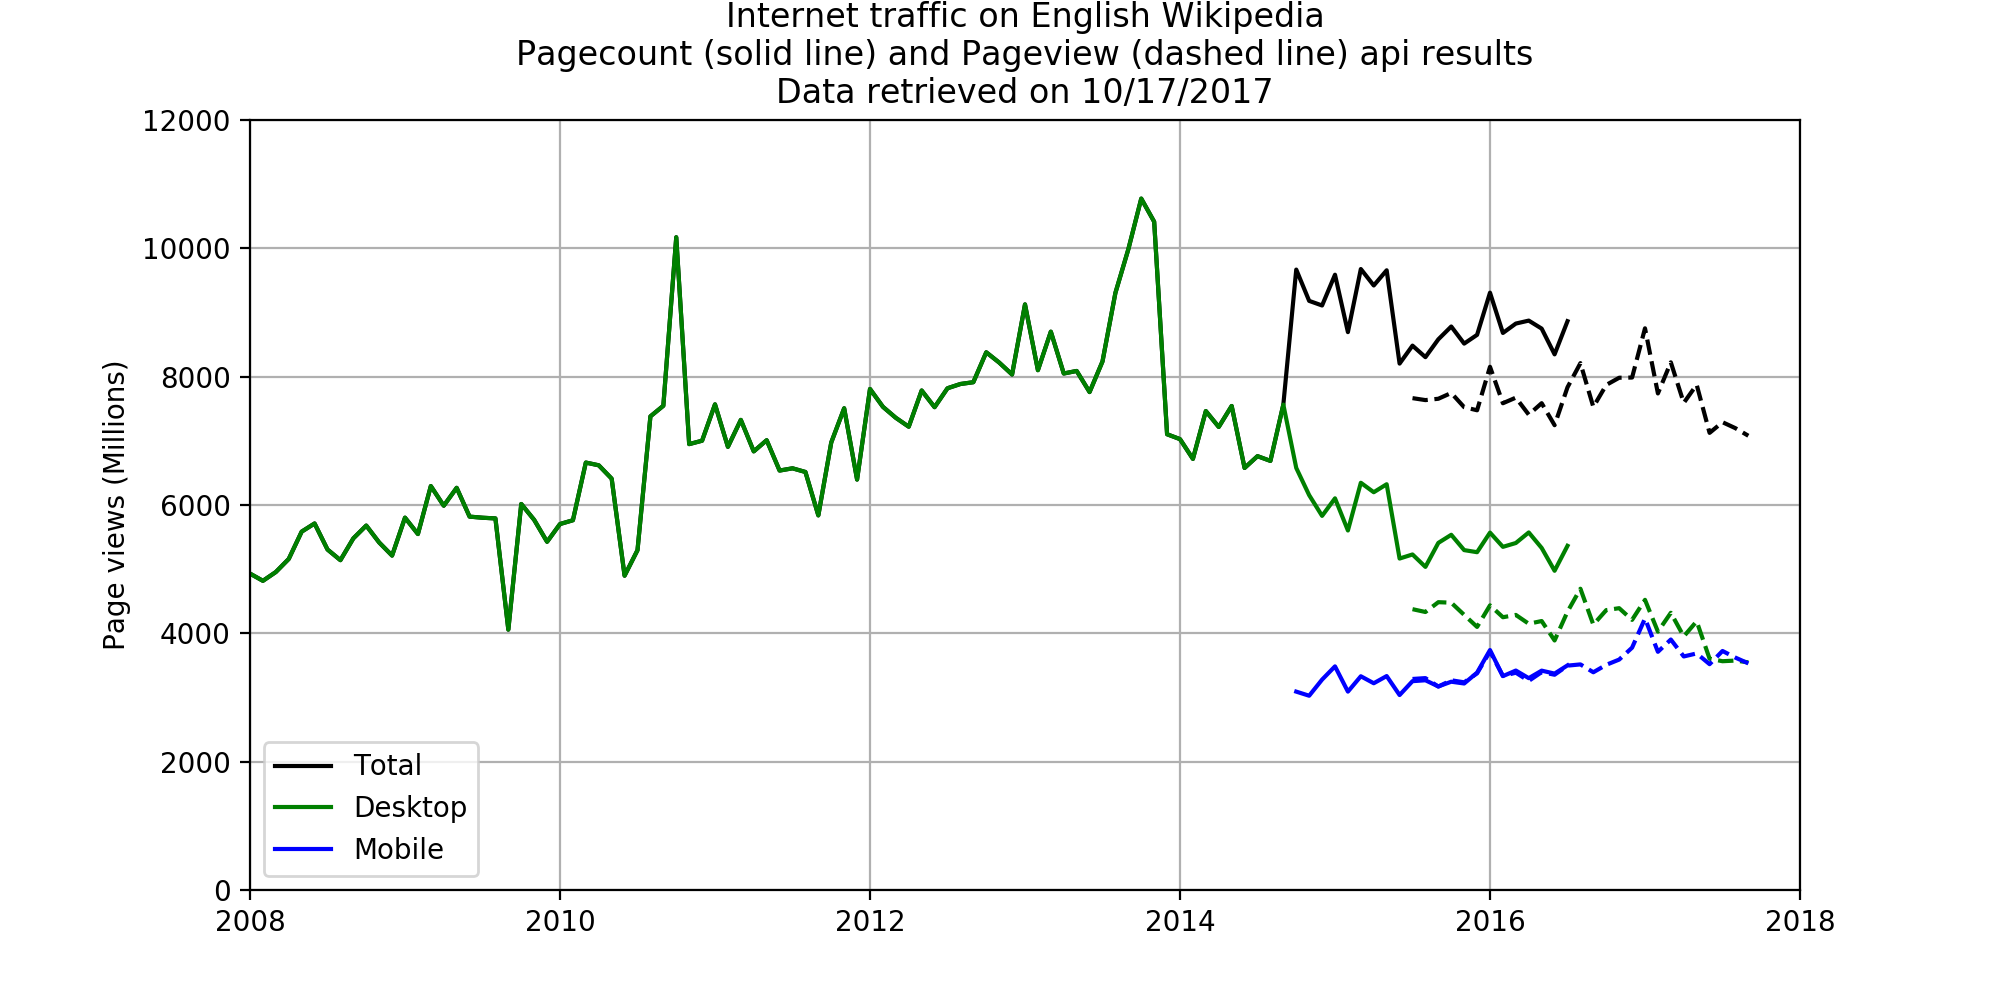

In [21]:
# use pagecountdf and pageviewdf for plotting 
#%matplotlib notebook
#%matplotlib
plt.figure(figsize=(10,5))

# Plot pagecount api data
plt.plot(pagecountdf['x'],pagecountdf['pagecount_all_views']/1e6,"k")
plt.plot(pagecountdf['x'],pagecountdf['pagecount_desktop_views']/1e6,"g")
plt.plot(pagecountdf['x'],pagecountdf['pagecount_mobile_views']/1e6,"b")

plt.legend(['Total','Desktop','Mobile'], loc=3)

# Plot pageview api data
plt.plot(pageviewdf['x'],pageviewdf['pageview_all_views']/1e6,"k--")
plt.plot(pageviewdf['x'],pageviewdf['pageview_desktop_views']/1e6,"g--")
plt.plot(pageviewdf['x'],pageviewdf['pageview_mobile_views']/1e6,"b--")

# Add labels and adjust figure
plt.ylabel('Page views (Millions)')
plt.title("Internet traffic on English Wikipedia\n" + "Pagecount (solid line) and Pageview (dashed line) api results\n" + "Data retrieved on 10/17/2017")

plt.xlim((2008,2018))
plt.ylim((0, 12000))
plt.grid()


### Remarks
The number of page views show a general upward trend until about 2014 with two promient spikes in October of 2010 and 2013. A quick internet search didn't reveal an obvious news event to cause the spikes. Another general trend in the data is that while the total number of page views is remaining constant, the distribution of them between the desktop interface and a mobile device is changing. The results support the theory that more and more people are relying on mobile devices for general computing needs and forgoing a traditional 'desktop' computer. 